# Линейная регрессия: аналитический и численный подходы

## Импорт библиотек, установка константных значений

In [ ]:
import numpy as np
from sklearn.datasets import make_regression
from matplotlib import pyplot as plt

In [ ]:
RANDOM_STATE = 42
np.random.RandomState(RANDOM_STATE);

## Постановка задачи

Сгенерируем данные для задачи регрессии

In [ ]:
X, y = make_regression(n_samples=100, n_features=1, random_state=RANDOM_STATE, noise=10.0, bias=100.0)

Нарисуем сгенерированные данные

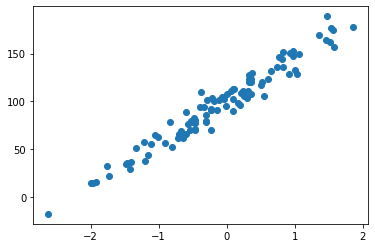

In [ ]:
plt.scatter(X, y);

## Аналитический подход

Решим задачу по точной формуле
$$w = (X^TX)^{-1}X^Ty$$

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, y)

pred_lr = lr.predict(X)

Посчитаем качество предсказания (будем использовать метрику $R^2$) и визуализируем результат.

r2: 0.9417294727711081


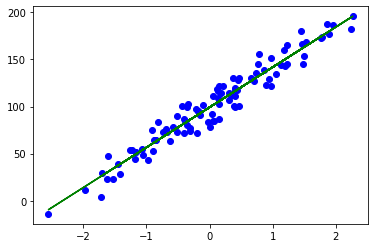

In [ ]:
from sklearn.metrics import r2_score

plt.scatter(X, y, c='blue')
plt.plot(X, pred_lr, '-', c='green')

print('r2:',r2_score(y, pred_lr))

## Численный подход

Теперь обучим `SGDRegressor` и сделаем предсказание.

In [ ]:
from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor()
sgd.fit(X, y)

pred_sgd = sgd.predict(X)

Добавим предсказание на график с исходными объектами и вычислим $R^2$.

r2: 0.9417294314576552


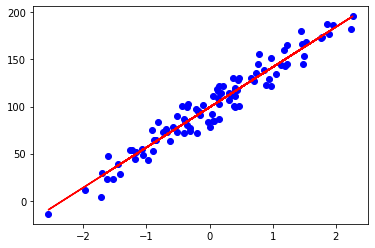

In [ ]:
plt.scatter(X, y, c='blue')
plt.plot(X, pred_sgd, '-', c='red')

print('r2:',r2_score(y, pred_sgd))

Сравним качество предсказний точным и численным методами

In [ ]:
print('r2 exact:',r2_score(y, pred_lr))
print('r2 numeric:',r2_score(y, pred_sgd))

r2 exact: 0.9417294727711081
r2 numeric: 0.9417294314576552


Численный подход дает чуть меньшее значение метрики качества, но разница в значениях $R^2$  
начинается в шестом знаке после запятой, то есть можно смело считать, что разницы в качестве нет.